In [32]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [3]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [4]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [5]:
# Import data
df = pd.read_csv('../src/train.csv')
df_raw = df.copy()  # Save original data set, just in case.

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.drop(['Name'],axis=1,inplace = True)

In [8]:
df.drop(['Ticket','Cabin'],axis=1,inplace = True)

In [9]:
df.drop(df[pd.isnull(df.Embarked)].index, inplace=True)

In [10]:
df.Age.fillna(1000,inplace = True)

In [11]:
df.drop(['PassengerId'],axis=1,inplace = True)

In [12]:
df.Sex = pd.Categorical(df.Sex)

In [13]:
df.Embarked = pd.Categorical(df.Embarked)

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [16]:
df.drop(['SibSp','Parch'],axis=1,inplace = True)

In [24]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap

In [25]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [28]:
y = df.Survived
X = df.drop('Survived',axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
logreg = LogisticRegression()

0.83856502242152464

In [34]:
# Model performance
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.782 +/- 0.035


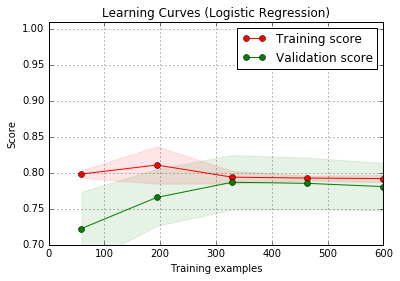

In [35]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

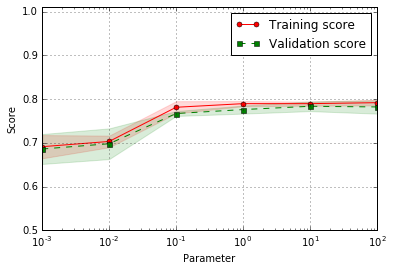

In [36]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

In [38]:
# Restart data set
df = df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace = True)

In [42]:
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [44]:
# Extract titles from name
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern

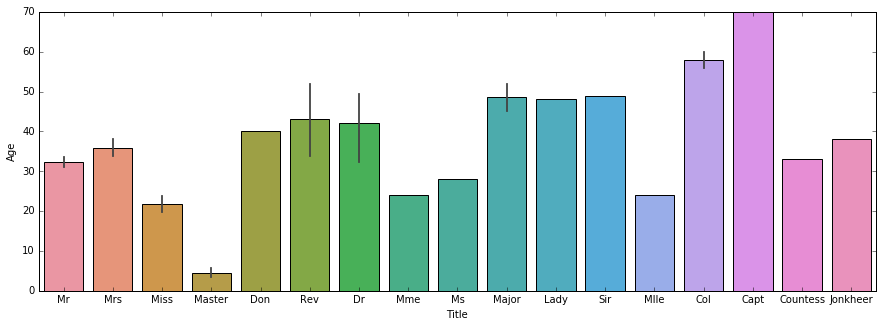

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Title'], y=df_raw['Age']);

In [47]:
# Means per title
df_raw['Title'] = df['Title']  # To simplify data handling
means = df_raw.groupby('Title')['Age'].mean()

In [48]:
map_means = means.to_dict()

In [81]:
df_test = df.copy()

In [82]:
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [110]:
nan_ages = df_test[pd.isnull(df_test['Age'])]
non_nan_ages = df_test[~(pd.isnull(df_test['Age']))]

In [111]:
nan_ages.Age = nan_ages.Title.map(map_means)

In [112]:
nan_ages['Imputed'] = 1
non_nan_ages['Imputed'] = 0

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [114]:
df_test = pd.concat([nan_ages,non_nan_ages], ignore_index=True)

In [116]:
df = df_test

In [117]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,6,0,3,male,32.368090,8.4583,Q,0,Mr,1
1,18,1,2,male,32.368090,13.0000,S,0,Mr,1
2,20,1,3,female,35.898148,7.2250,C,0,Mrs,1
3,27,0,3,male,32.368090,7.2250,C,0,Mr,1
4,29,1,3,female,21.773973,7.8792,Q,0,Miss,1


In [120]:
# Count how many people have each of the titles
df.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [121]:
# Map of aggregated titles:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [123]:
df.Title=df.Title.map(titles_dict)

In [127]:
# Transform into categorical
df['Title'] = pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
FamilySize        int64
Title          category
Imputed           int64
dtype: object

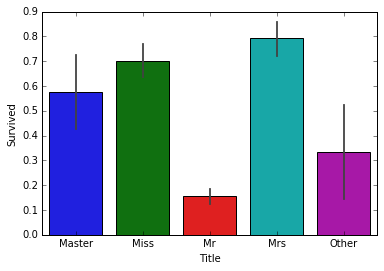

In [130]:
sns.barplot(x=df['Title'], y=df['Survived']);

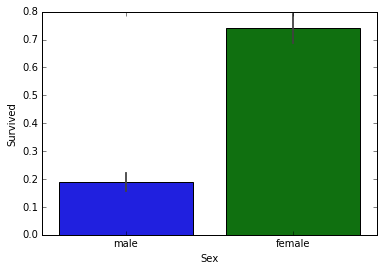

In [131]:
sns.barplot(x=df['Sex'], y=df['Survived']);

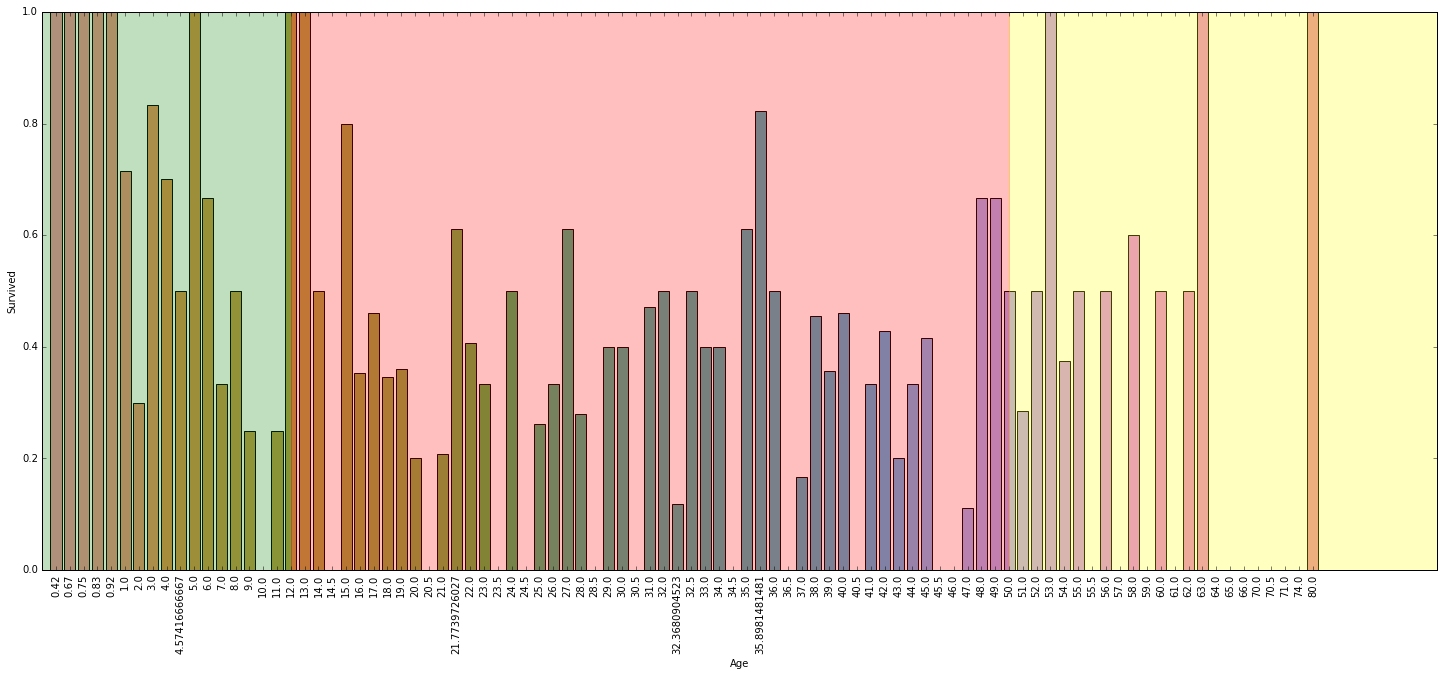

In [138]:
# Plot
'''
Probably, there is an easier way to do this plot. I had a problem using
plt.axvspan because the xmin and xmax values weren't
being plotted correctly. For example, I would define xmax = 12 and only 
the area between 0 and 7 would be filled. This was happening because my 
X-axis don't follow a regular (0, 1, ..., n) sequence. After some trial
and error, I noticed that xmin and xmax refer to the number of elements in
the X-axis coordinate that should be filled. Accordingly, I defined two 
variables, x_limit_1 and x_limit_2, that count the number of elements that
should be filled in each interval. Sounds confusing? To me too.
'''
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90);

In [139]:
# Bin data
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

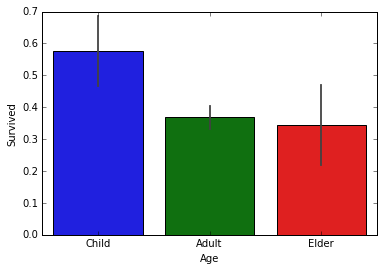

In [140]:
# Plot
sns.barplot(df['Age'], df['Survived']);

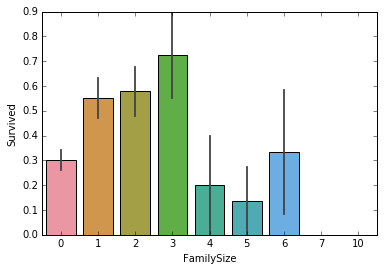

In [141]:
# Plot
sns.barplot(df['FamilySize'], df['Survived']);

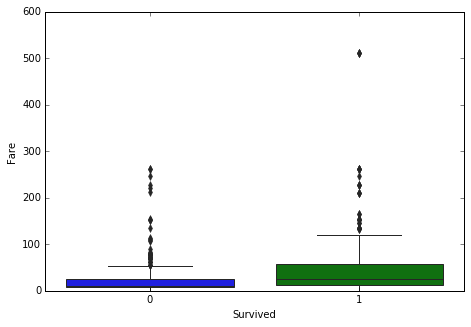

In [142]:
# Plot
plt.figure(figsize=(7.5,5))
sns.boxplot(df['Survived'], df['Fare']);

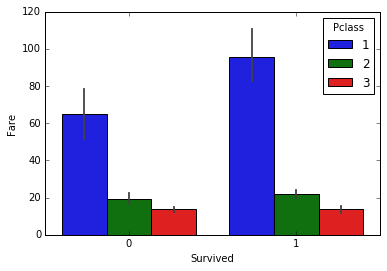

In [143]:
# Plot
sns.barplot(df['Survived'], df['Fare'], df['Pclass']);

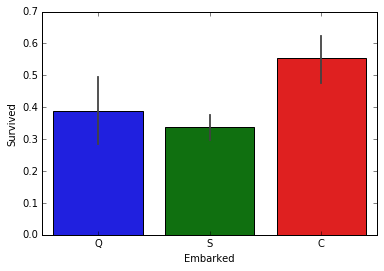

In [144]:
# Plot
sns.barplot(df['Embarked'], df['Survived']);

In [145]:
# Compare with other variables
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Fare,FamilySize,Imputed
Embarked,,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000,0.226190
Q,417.896104,0.389610,2.909091,13.276030,0.597403,0.636364
S,449.527950,0.336957,2.350932,27.079812,0.984472,0.139752


In [146]:
# Relationship with age
df.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child     13
          Adult    140
          Elder     15
Q         Child      4
          Adult     70
          Elder      3
S         Child     56
          Adult    543
          Elder     45
Name: PassengerId, dtype: int64

In [147]:
# Relationship with sex
df.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

In [148]:
df.drop('PassengerId', axis=1, inplace=True)
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df = pd.get_dummies(df, drop_first=1)  

In [149]:
df.head()

,Survived,Fare,FamilySize,Imputed,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,8.4583,0,1,0,1,1,1,0,1,0,0,1,0,0
1,1,13.0000,0,1,1,0,1,1,0,0,1,0,1,0,0
2,1,7.2250,0,1,0,1,0,1,0,0,0,0,0,1,0
3,0,7.2250,0,1,0,1,1,1,0,0,0,0,1,0,0
4,1,7.8792,0,1,0,1,0,1,0,1,0,1,0,0,0


In [150]:
# Get training and test sets
from sklearn.model_selection import train_test_split

X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [151]:
# Apply Box-Cox transformation
from scipy.stats import boxcox

X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare'] + 1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare'] + 1)[0]

In [152]:
# Rescale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

In [153]:
# Get polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [155]:
# Debug
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2', 'x10 x11', '

In [159]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Get score using original model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

k_features_highest_score = 0

## Get score using models with feature selection
for i in range(1, X_train_poly.shape[1]+1, 1):
    # Select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)

    # Model with i features selected
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i,np.mean(scores), np.std(scores)))
    
    # Save results if best score
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
        
# Print the number of features
print('Number of features when highest score: %i' % k_features_highest_score)

CV accuracy (original): 0.827 +/- 0.051
CV accuracy (number of features = 1): 0.784 +/- 0.068
CV accuracy (number of features = 2): 0.784 +/- 0.068
CV accuracy (number of features = 3): 0.784 +/- 0.068
CV accuracy (number of features = 4): 0.784 +/- 0.068
CV accuracy (number of features = 5): 0.791 +/- 0.064
CV accuracy (number of features = 6): 0.787 +/- 0.067
CV accuracy (number of features = 7): 0.777 +/- 0.053
CV accuracy (number of features = 8): 0.782 +/- 0.056
CV accuracy (number of features = 9): 0.799 +/- 0.051
CV accuracy (number of features = 10): 0.799 +/- 0.051
CV accuracy (number of features = 11): 0.795 +/- 0.047
CV accuracy (number of features = 12): 0.795 +/- 0.047
CV accuracy (number of features = 13): 0.795 +/- 0.047
CV accuracy (number of features = 14): 0.795 +/- 0.047
CV accuracy (number of features = 15): 0.795 +/- 0.047
CV accuracy (number of features = 16): 0.794 +/- 0.048
CV accuracy (number of features = 17): 0.794 +/- 0.048
CV accuracy (number of features = 

In [162]:
# Select features
select = SelectKBest(score_func=chi2, k=85)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

In [163]:
# Fit model
logreg = LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
# Model performance
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.826 +/- 0.037


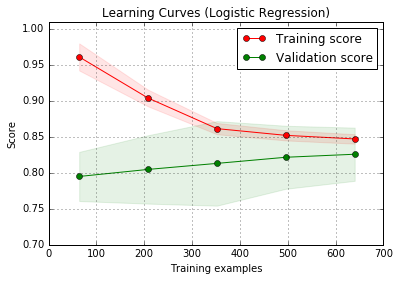

In [165]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, 
                    y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

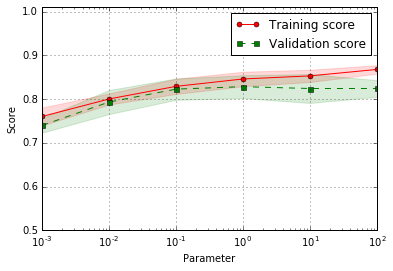

In [166]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train, 
                      param_name=param_name, ylim=(0.5, 1.01), param_range=param_range);

In [168]:
# Get test data set
df = pd.read_csv('../src/test.csv')
df_raw = df.copy()

In [169]:
# Transform data set (based on Chapter 2)

## 2.2
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  
df_raw['Title'] = df['Title']  
means = df_raw.groupby('Title')['Age'].mean()
map_means = means.to_dict()
idx_nan_age = df.loc[np.isnan(df['Age'])].index
df.loc[idx_nan_age, 'Age'] = df['Title'].loc[idx_nan_age].map(map_means)
df['Title'] = df['Title'].map(titles_dict)
df['Title'] = pd.Categorical(df['Title'])

df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1

df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])

## 2.3
passenger_id = df['PassengerId'].values
df.drop('PassengerId', axis=1, inplace=True)
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df = pd.get_dummies(df, drop_first=1)

df = df.fillna(df.mean())  # There is one missing value in 'Fare'

X = df[df.loc[:, df.columns != 'Survived'].columns]

X_transformed = X.copy()
X_transformed['Fare'] = boxcox(X_transformed['Fare'] + 1)[0]

scaler = MinMaxScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

poly = PolynomialFeatures(degree=2).fit(X_transformed)
X_poly = poly.transform(X_transformed_scaled)

X_poly_selected = select.transform(X_poly)

In [170]:
# Make predictions
predictions = logreg.predict(X_poly_selected)

In [171]:
# Generate submission file
submission = pd.DataFrame({ 'PassengerId': passenger_id,
                            'Survived': predictions})
submission.to_csv("../src/test_pred_logreg.csv", index=False)